An assumption we often make in trading research is that the future will be at least a little like the past. 

I see a lot of beginners making this assumption implicitly without recognising that they're making it or thinking about whether it's reasonable to do so. 

That's a mistake. 

If you are making this assumption, you need to be aware of it and you need to have confidence that it's a good assumption to be making. 

There are a couple of ways we can explore whether it's a good assumption:
- Reason and eyeball
- Data analysis

In this article, we'll look into both of these approaches, but we'll mostly focus on data analysis. I'll show you some simple techniques that you can start using immediately. 

## Reason and eyeball

The first approach is simple - eyeballing charts and applying reason.

A simple example is the equity risk premium. 

We observe total equity returns in the past being very positive:  

![equity returns chart](https://robotwealth.com/wp-content/uploads/2024/04/us_stock_bond_returns.png)  
*Source: Triumph of the Optimists*

And we think we understand why - because equities are risky, they tend to trade lower than the discounted sum of their expected cash flows. Read more about the equity risk premium [here](https://robotwealth.com/three-types-of-systematic-strategy-that-work/).

So we make the assumption that they'll continue to go up, at least over the long term, in the future. 

Is that reasonable?

We can't really know for sure, but some things that can help us weigh the evidence include:
- Does it make economic sense? *Yes, human risk preferences dictate that a risky investment trades lower than an equivalent risk-free investment.*
- Do we see evidence of it in the data? *Yes, we see stocks going up in the long term - see the chart above.*
- Is the effect consistent over time? *Yes, but of course there are periods where stock returns were negative - see the chart above.*
- Is the effect consistent elsewhere (other markets)? *Yes, it shows up in nearly every developed market for which we have data:*

![chart of international stock returns](https://robotwealth.com/wp-content/uploads/2024/04/international_stocks.png)  
*Source: Triumph of the Optimists*

The answers to these questions can never provide us with absolute certainty, but if they're all pointing in the right direction, then we can at least have some confidence that our assumption of persistence is reasonable. 

In the case of the equity risk premium, I think we can have confidence in our assumption of persistence simply by applying some reason and eyeballing some data. 

But that won't always be the case. What if we need to dig into the data in more depth? How do we do that?

## Using data analysis to explore the assumption of persistence

Next I want to show you some simple data analysis techniques you can use to explore the assumption of persistence. 

We'll do this in the context of portfolio construction and risk management. 

When we create portfolios, we size positions based on trying to maximise some objective - usually risk-adjusted returns. 

![portfolio construction](https://robotwealth.com/wp-content/uploads/2024/04/portfolio_construction.png)

We tend to forecast our risk metrics (variance, covariance) by estimating them and assuming they tend to stay roughly the same. *Is that reasonable?*

Let's start with volatility persistence. We'll go through each of our questions in turn. 

### Would it make economic sense for volatility to be persistent? 

Yes, I think so, because a given asset has similar risk exposures over time. 

### Do we see evidence of persistence in the data?

To answer this using data analysis, we can look very directly by splitting our data up into periods that don't overlap, and seeing if one period's volatility is correlated with the next:

![two-period example](https://robotwealth.com/wp-content/uploads/2024/04/vol_persistence.png)

The example in the image above is easy to understand, but it might not be obvious how to do do it with a continuous time-series. This is the process in a nutshell:

- Start with daily OHLC observations because they're easy to work with 
- Estimate volatility as the range in per cent between the high and the low (there are many ways to estimate volatility; this is just a simple one)
- Copy the volatility time series and shift it by 1 day
- Plot a scatter of the volatility estimate against the shifted volatility estimate and see if there's some relationship

![the simplest thing slide](https://robotwealth.com/wp-content/uploads/2024/04/simplest_thing.png)

Here's how you would do this in R. 

First set up our session, load some data for VTI, and plot it:

In [5]:
# setup
library(tidyverse)

# set chart options
options(repr.plot.width = 14, repr.plot.height = 7, warn = -1)
theme_set(theme_bw())
theme_update(text = element_text(size = 20))

In [31]:
# load some data - daily prices for macro etfs:
prices <- read_csv("https://raw.githubusercontent.com/Robot-Wealth/trader-tales/master/data/macro_etfs.csv")
prices %>% head

Rows: 34946 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ticker
dbl  (6): open, high, low, close, volume, closeadjusted
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ticker,date,open,high,low,close,volume,closeadjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DBC,2010-01-04,25.17,25.240,25.072,25.24,2046900,23.239
EMB,2010-01-04,101.74,101.930,101.330,101.93,120500,52.392
GLD,2010-01-04,109.82,110.140,109.310,109.80,16224100,109.800
IEF,2010-01-04,88.74,88.950,88.630,88.82,619100,66.539
TLT,2010-01-04,89.84,90.100,89.580,89.81,2829100,60.998
TMF,2010-01-04,77.65,78.475,77.275,78.10,9640,66.373


In [32]:
# get data for US stocks only
VTI <- prices %>% filter(ticker == "VTI")
VTI %>% head

ticker,date,open,high,low,close,volume,closeadjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
VTI,2010-01-04,56.86,57.380,56.84,57.31,2251500,44.181
VTI,2010-01-05,57.34,57.540,57.11,57.53,1597700,44.351
VTI,2010-01-06,57.50,57.715,57.41,57.61,2120300,44.412
VTI,2010-01-07,57.55,57.889,57.29,57.85,1656700,44.597
VTI,2010-01-08,57.70,58.046,57.56,58.04,1650000,44.744
VTI,2010-01-11,58.30,58.350,57.85,58.12,1883100,44.806


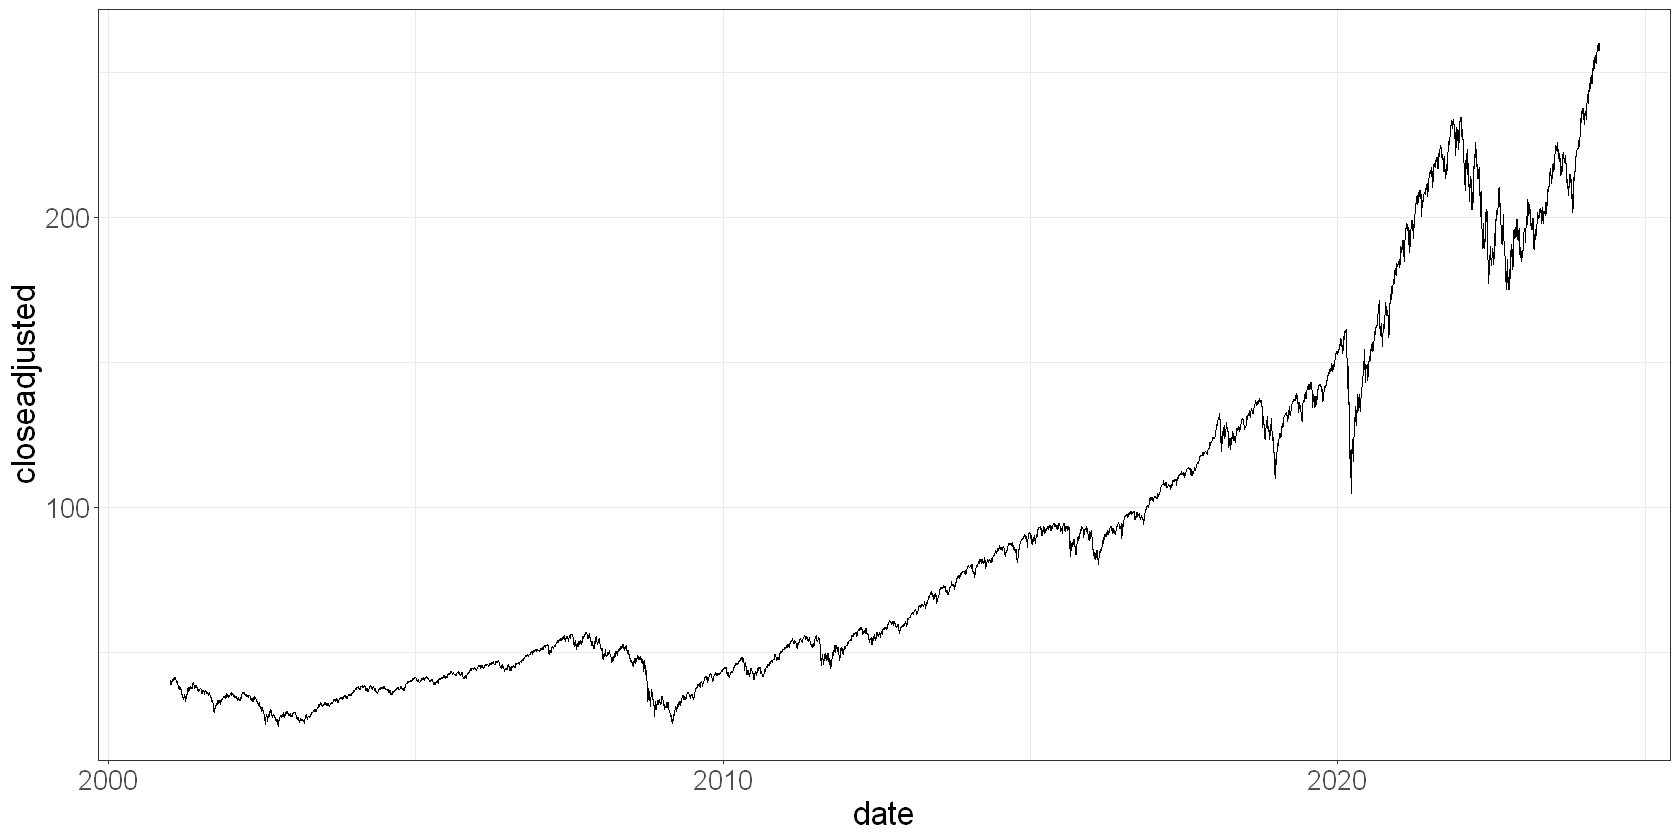

In [21]:
# plot
VTI %>%
  ggplot(aes(x=date, y=closeadjusted)) +
    geom_line()

Estimate daily volatility of VTI as the percentage range and shift:

In [22]:
VTI <- VTI %>%
  # calculate volatility as pct range
  mutate(range_pct = (high/low - 1) * 100) %>% 
  # ensure our observations are arranged by date
  arrange(date) %>%
  # shift our observations
  mutate(next_day_range_pct = lead(range_pct, 1)) %>%
  # remove NAs (we'll have an NA on our last observation as there's no tomorrow)
  na.omit()

VTI %>% tail

ticker,date,open,high,low,close,volume,closeadjusted,range_pct,next_day_range_pct
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
VTI,2024-03-25,258.10,258.49,257.79,257.92,2709549,257.92,0.2715388,0.6024565
VTI,2024-03-26,258.80,258.83,257.28,257.46,2589441,257.46,0.6024565,0.7131507
VTI,2024-03-27,259.13,259.85,258.01,259.73,4025990,259.73,0.7131507,0.3156760
VTI,2024-03-28,259.80,260.58,259.76,259.90,2663934,259.90,0.3156760,0.6571826
VTI,2024-04-01,260.32,260.38,258.68,259.70,3288458,259.70,0.6571826,0.5113392
VTI,2024-04-02,257.50,257.50,256.19,257.30,3206715,257.30,0.5113392,0.6943092


Plot a scatter:

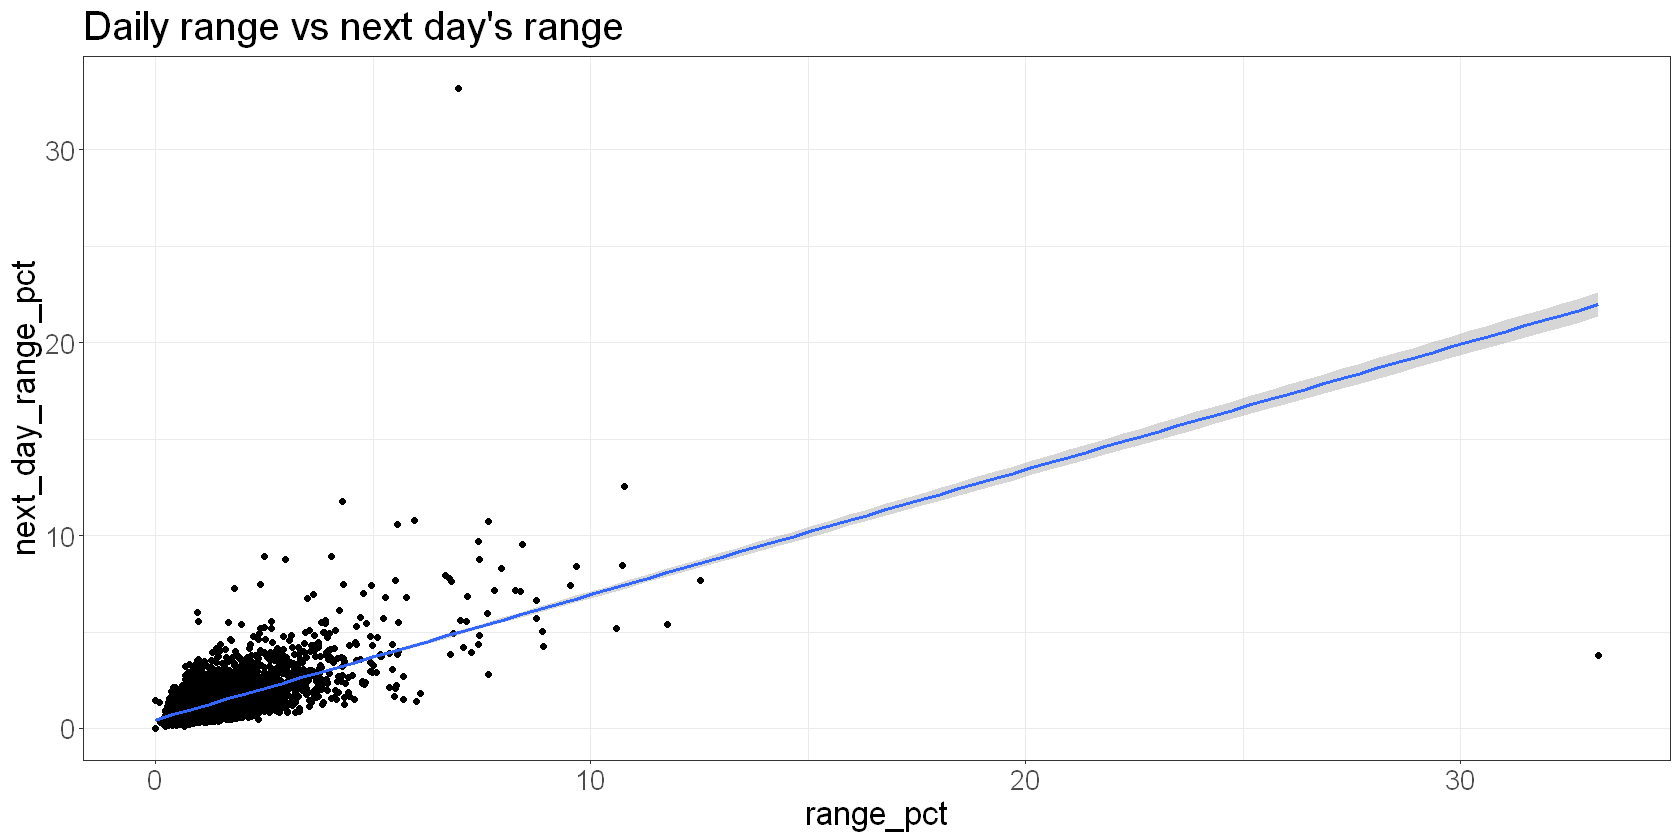

In [23]:
VTI %>% 
  ggplot(aes(x=range_pct, y=next_day_range_pct)) + 
  geom_point() +
  # add regression line
  geom_smooth(method = "lm", formula = 'y ~ x') +
  labs(
    title = "Daily range vs next day's range"
  )

Wee see a noisy positive relationship.  

If VTI moved a lot yesterday, it tends to move a lot today as well. 

So we feel confident that daily range is noisily persistent, based on what we observed in the data. 

#### Overlapping data

An important consideration is overlapping data. 

In our example, we had no overlapping data because each daily price bar gave us a single estimate of volatility for that day. 

But say we estimated volatility using the *average* range over 30 days instead. Now we have a window of 30 days' worth of price bars going into our estimate of volatility today. 

You can see how this creates relationships between subsequent daily estimates of volatility: tomorrow's estimate differs from today's estimate by only a single data point out of 30. 

If you have rolling windows of data in your estimate, then you need to remove the data points where they overlap, which can greatly reduce the amount of data you're working with. 

### Is this effect consistent over time?

So far, we've looked at our entire data set. But somtimes that can hide important information.  

One useful and easy thing to do is to split our data into separate time periods, repeat the analysis above, and see if the effect is consistent through time. If it is, then that would be further evidence that our effect is genuinely persistent. 

For our daily VTI volatility estimates, we'll split our data up by year and make a scatter plot for each year. 

This is very simple in R. We just create a column for the year of each observation, then use `facet_wrap` to make a separate plot for each year:

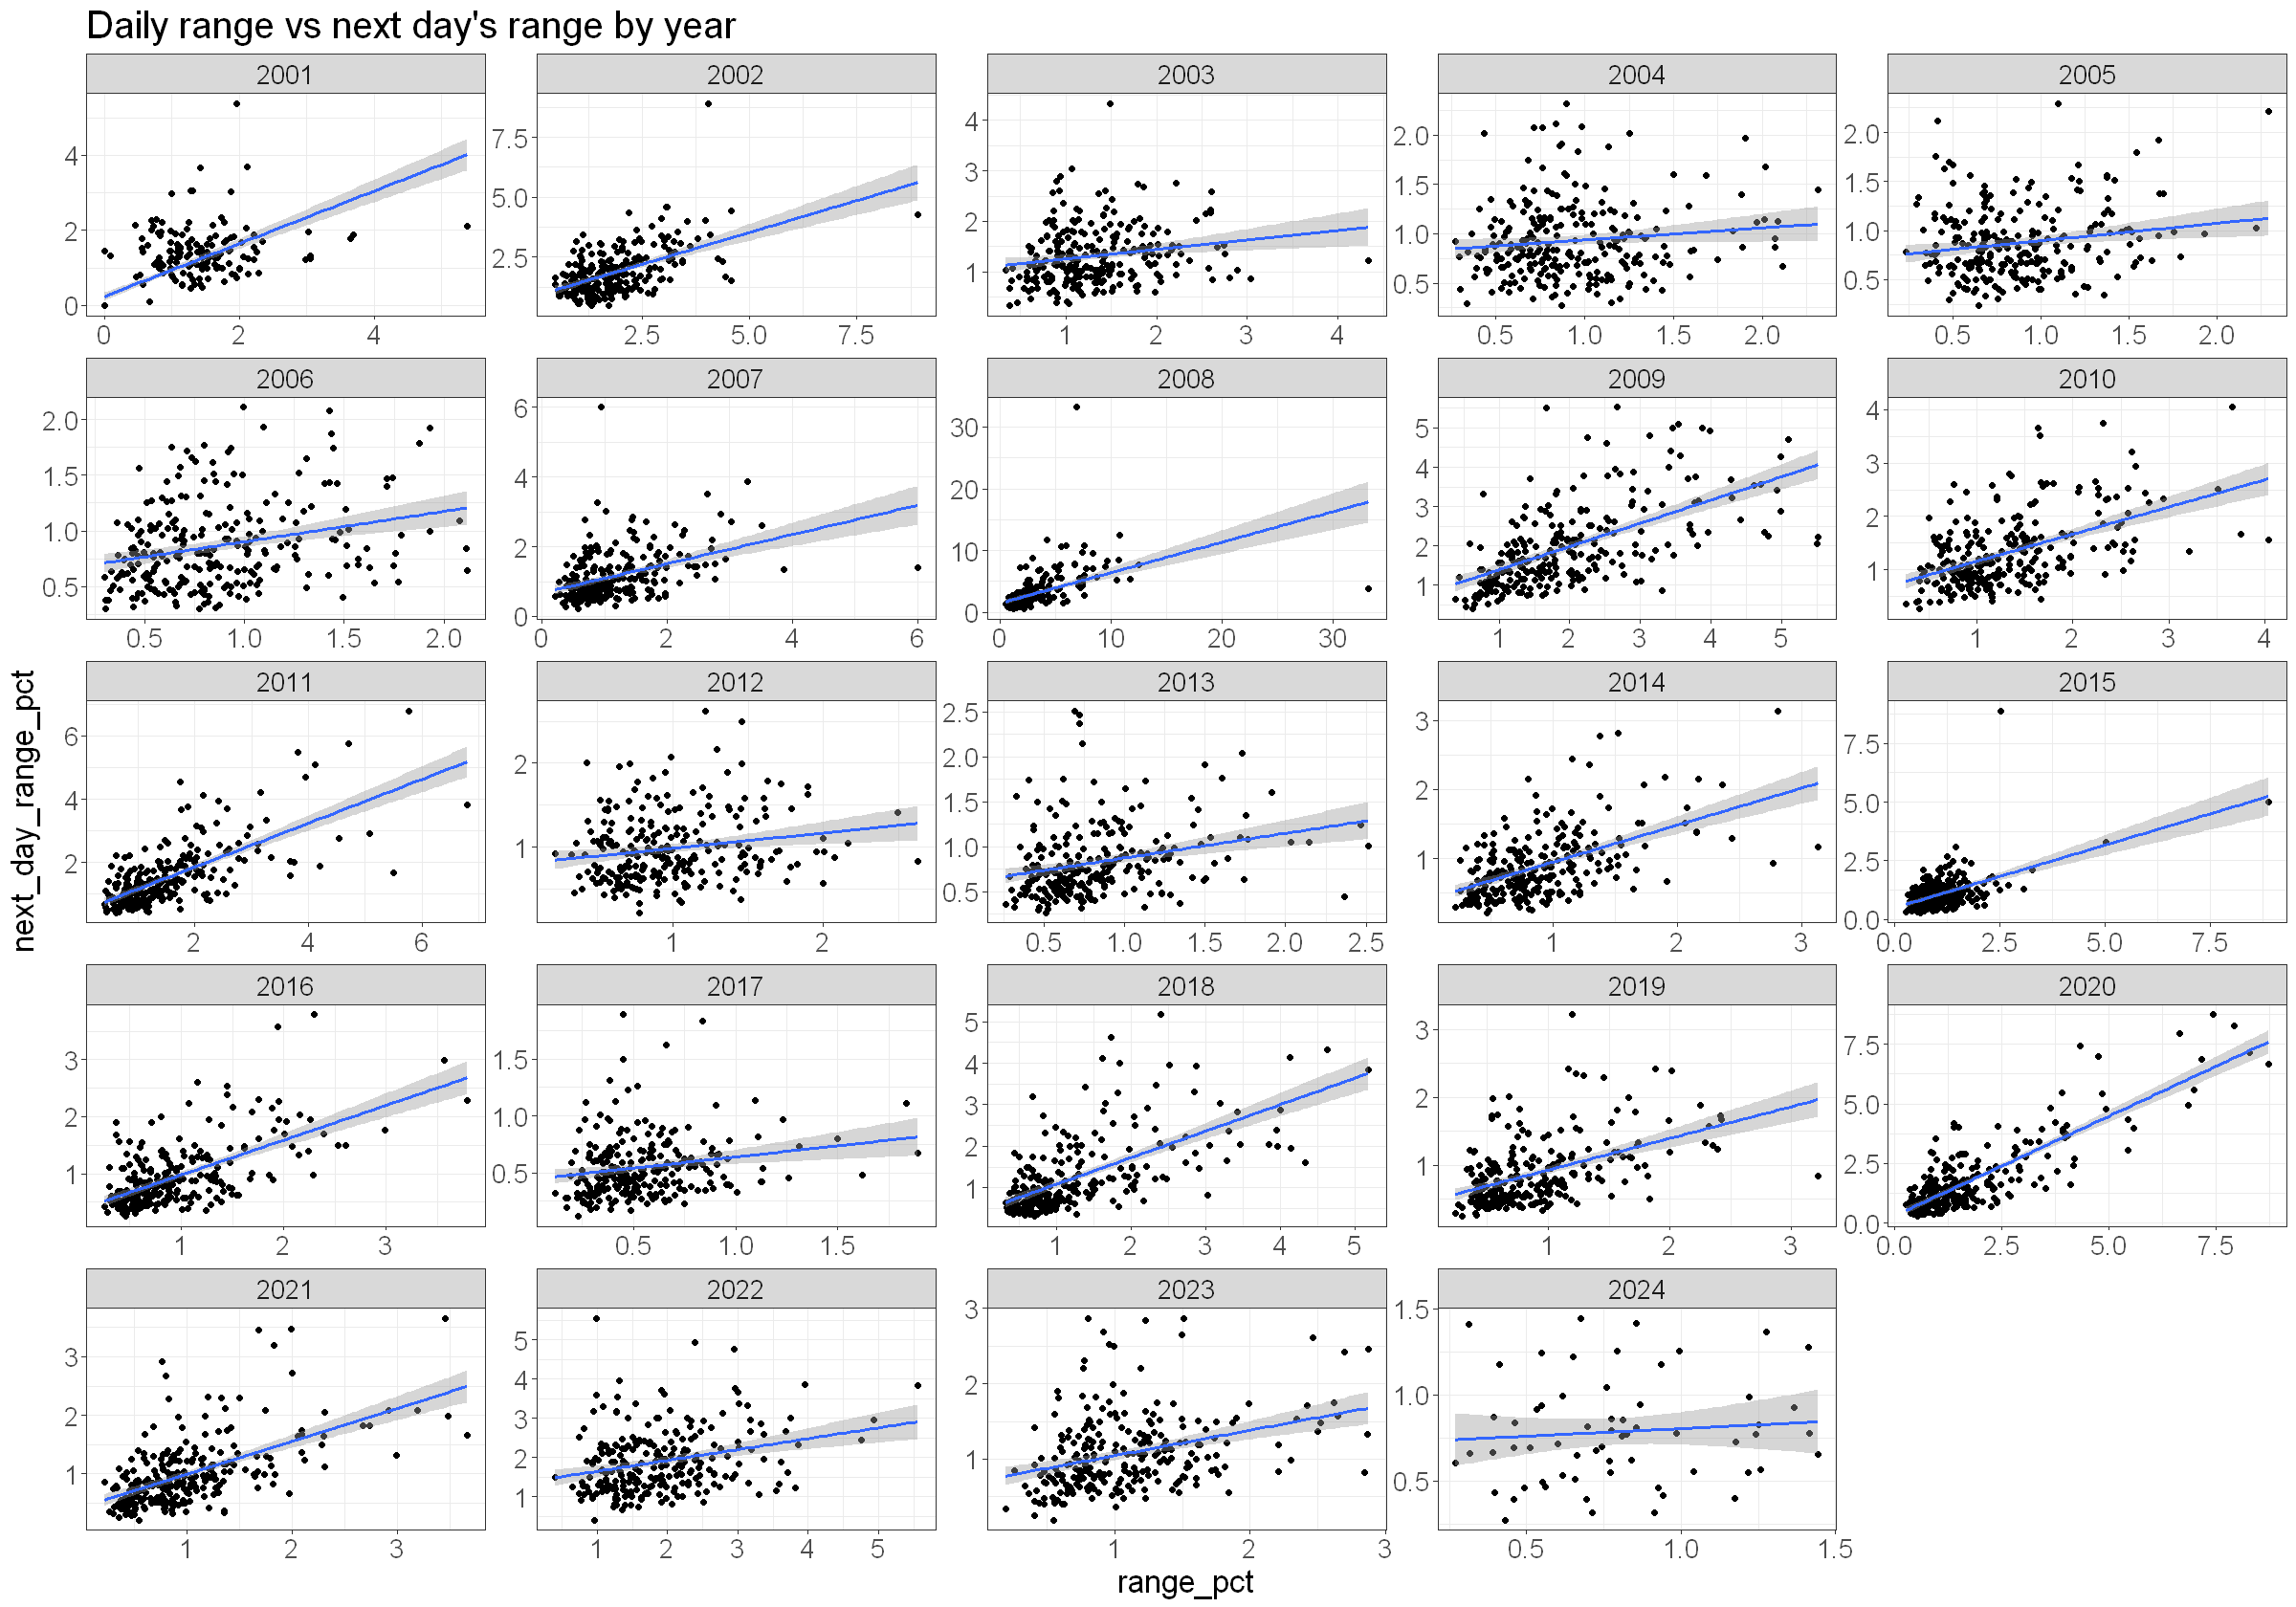

In [26]:
# we need a bigger plot
options(repr.plot.width = 20, repr.plot.height = 14)

VTI %>%
  mutate(year = year(date)) %>%
  ggplot(aes(x=range_pct, y=next_day_range_pct)) + 
  geom_point() + 
  geom_smooth(method = 'lm', formula = 'y ~ x') +
  facet_wrap(~year, scales = "free") +
  labs(
    title = "Daily range vs next day's range by year"
  )

# reset plot options to default
options(repr.plot.width = 14, repr.plot.height = 7)

You can see that while some years are more volatile than others, the relationship between today's and yesterday's volatilities has been reasonably consistent over time. And while the slope of the regression line has changed over the years, it's always up and to the right. 

So this is another data point that we can use as evidence that US stock volatility is reasonably persistent. 

### Is the effect consistent elsewhere?

We can get more evidence by looking for the effect in other places we expect it to show up. 

Let's repeat our analysis, but this time we'll do it for all the tickers in our data.

Again, this is quite simple in R. We make use of the `group_by` function to operate on each ticker separately:

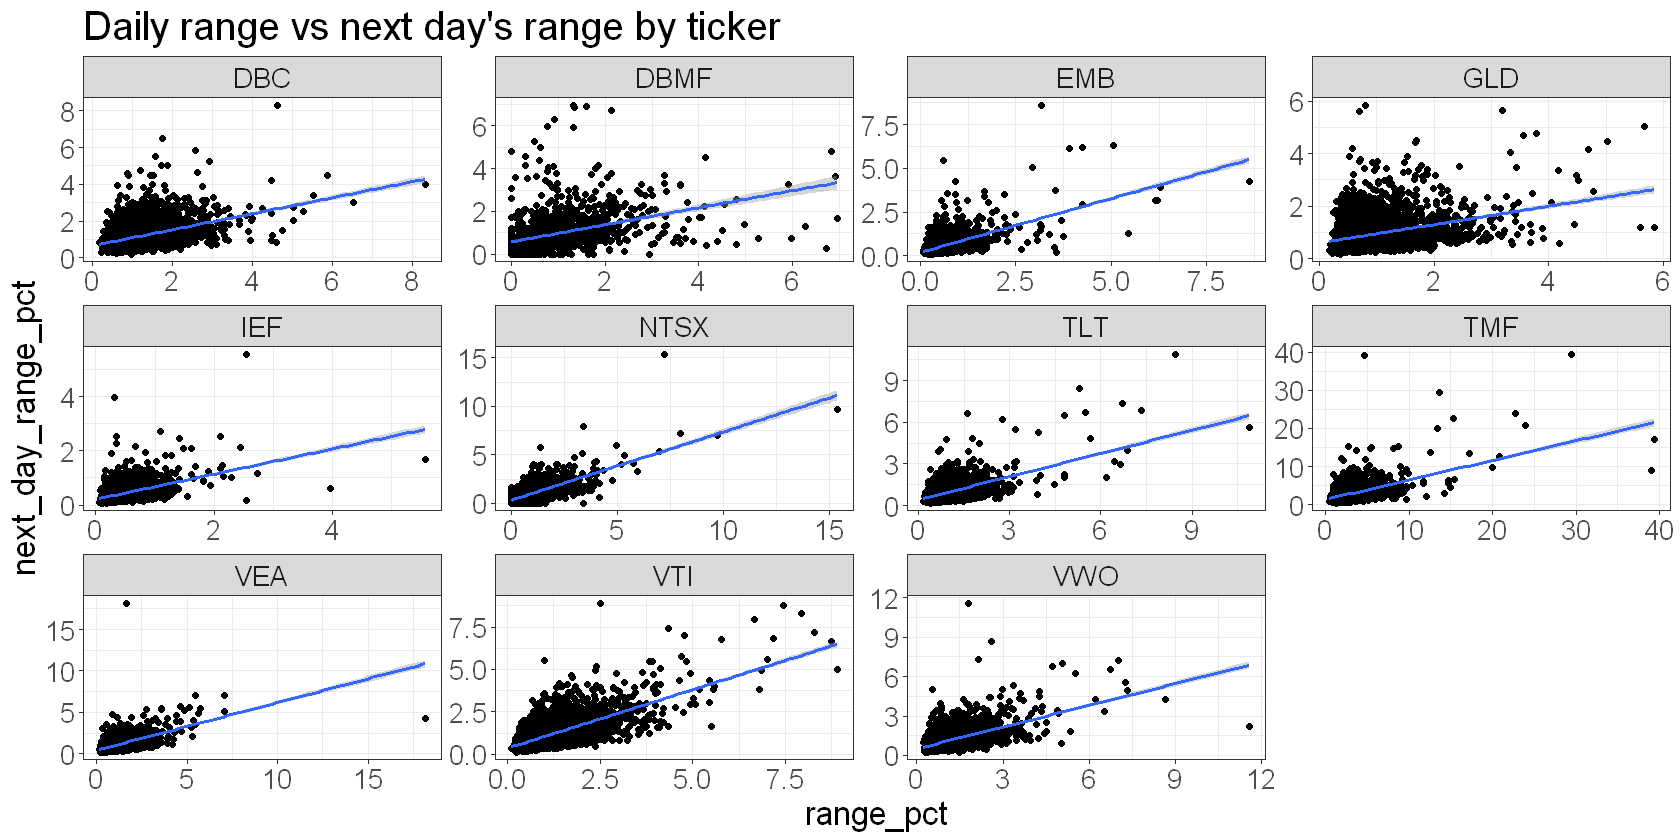

In [34]:
prices %>% 
  # calculate the daily range
  mutate(range_pct = (high/low - 1) * 100) %>%
  # perform subsequent operations on each ticker separately
  group_by(ticker) %>% 
  arrange(date) %>%
  mutate(next_day_range_pct  = lead(range_pct, 1)) %>%
  na.omit() %>%
  # plot each ticker separately
  ggplot(aes(x=range_pct, y=next_day_range_pct)) + 
  geom_point() + 
  geom_smooth(method = 'lm', formula = 'y ~ x') +
  facet_wrap(~ticker, scales = "free") +
  labs(
    title = "Daily range vs next day's range by ticker"
  )


We see that the effect is consistent across assets as well. 

So at this point, we have some fairly strong evidence for the persistence of volatility. 

## Summary

It's OK to make the assumption of persistence. But you can get yourself into trouble if you don't think about when you're making it and whether it's reasonable to do so. 

*The overarching point is to be aware of the assumptions you're making, sometimes implicitly, and think about whether they reflect reality.*

The simple data analysis techniques we used in this article can help you to determine when it's reasonable to assume persistence. 

You can apply this process to anything for which you're making the assumption of persistence. A useful exercise is to repeat the analysis for correlation or covariance between pairs of assets. (Spoiler alert: you should find that correlations are also persistent, but that this persistence is much noisier than we saw for volatility.) 

You might also like to repeat the analysis for asset returns - you'll find almost no persistence at all, other than a very weak negative relationship at the daily timescale in some assets. 